In [27]:
from zget_data import get_responses, get_qdetails, page_map, attention, quest_map
import pandas as pd
import json

In [28]:
password_response, time_response, survey_response = get_responses(3)

Total: 26


## Password Analysis

In [29]:
pd.DataFrame(password_response)

,password2,password2_recall1
0,pSVNLb85CUNPCwX,NaN
1,ALB*1988,NaN
2,qwerty098!@#123cow,NaN
3,htdhtshstzdhthzhtt57@5,NaN
4,Blue123,NaN
5,5fchjui^2ad,NaN
6,BarronPeter#70,NaN
7,@thePogjuice,NaN
8,B0ilerMak3r!,NaN
9,Protect123,NaN


## Time Analysis

,startstudy,fpasssurvey,pagegif,desinint,quest,csquest,motivation,spass,scog,spasssurvey,spassrecall,demo,total (mins)
0,5.839,13.774,12.693,19.878,67.504,134.684,15.391,25.888,13.926,19.650,9.519,48.709,6.457583
1,2.488,4.870,3.625,644.368,20.175,52.286,3.075,6.243,6.703,12.893,5.351,25.363,13.124000
2,3.674,12.131,8.609,16.923,44.405,275.207,16.491,26.397,17.456,21.576,9.910,40.114,8.214883
3,12.377,9.738,5.385,9.508,37.386,90.432,7.297,25.108,19.352,14.337,8.473,26.208,4.426683
4,2.515,12.946,3.041,5.930,66.074,87.206,3.848,64.031,10.265,16.681,13.065,30.811,5.273550


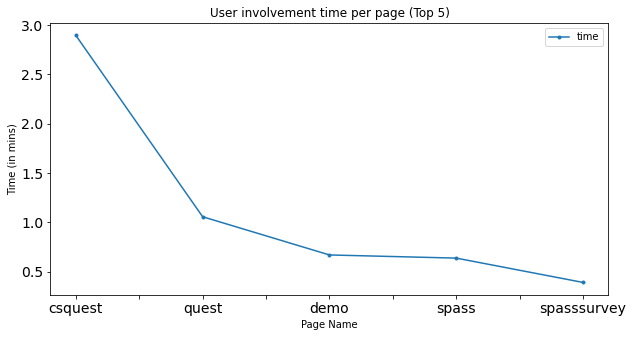

In [30]:
page_time_df = pd.DataFrame(time_response)
page_time_df = page_time_df.sort_index(axis=1, key=lambda x: x.astype(int))
page_time_df = page_time_df.rename(page_map, axis=1)
page_time_df['total (mins)'] = page_time_df.sum(axis=1)/60
display(page_time_df.head())

# top 5 pages with higher time
top5 = pd.DataFrame(columns=['page', 'time'])
for i, data in page_time_df.median().div(60).sort_values(ascending=False).head(5).items():
    top5 = pd.concat([top5, pd.DataFrame([[i, data]], columns=top5.columns)])

_ = top5.plot(x='page', y='time', figsize=(10, 5), xlabel="Page Name", ylabel="Time (in mins)", title="User involvement time per page (Top 5)", fontsize=14, style=".-")

## Survey Response Analysis

In [31]:
survey_response_df = pd.DataFrame(survey_response)

### Quest

In [32]:
normqsid = ['1-2', '1-4', '1-7', '1-10', '1-12', '1-13', '1-16']
quest = pd.DataFrame(survey_response_df['7'].to_dict()).astype(int)
quest.drop(attention.get('7'), inplace=True)
normquest = 8 - quest.loc[normqsid]
quest.update(normquest)


# normalize scale 1 to 8 to scale -3 to 3
quest = quest - 4
quest.update(quest)

new_index = {}
for qsid in quest.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('7', qsid).replace("'", '"')).get('elements').get(likert_scale)
new_index
quest = quest.rename(new_index)
quest['mean'] = quest.mean(axis=1)
quest['median'] = quest.median(axis=1)
quest['STD'] = quest.std(axis=1)

quest

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,mean,median,STD
ordered,2.0,-3.0,3.0,1.0,3.0,2.0,2.0,2.0,1.0,3.0,...,3.0,2.0,2.0,2.0,2.0,-1.0,1.0,1.730769,2.000000,1.349695
helpful,1.0,3.0,-2.0,1.0,3.0,2.0,3.0,2.0,1.0,2.0,...,3.0,2.0,2.0,1.0,2.0,2.0,1.0,1.884615,2.000000,1.099944
beneficial,1.0,-1.0,-2.0,2.0,3.0,2.0,3.0,1.0,1.0,1.0,...,3.0,3.0,2.0,1.0,2.0,1.0,2.0,1.538462,2.000000,1.314688
organized,2.0,3.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,3.0,3.0,2.0,1.0,2.0,1.0,0.0,1.961538,2.000000,0.792627
structured,2.0,2.0,3.0,1.0,3.0,2.0,2.0,2.0,1.0,3.0,...,3.0,2.0,1.0,1.0,2.0,2.0,1.0,1.923077,2.000000,0.813130
well grouped,2.0,1.0,3.0,1.0,3.0,1.0,3.0,1.0,1.0,2.0,...,3.0,3.0,-1.0,2.0,3.0,1.0,2.0,1.730769,2.000000,1.264696
rewarding,-2.0,0.0,-2.0,0.0,2.0,1.0,3.0,1.0,1.0,2.0,...,3.0,2.0,2.0,-1.0,2.0,1.0,-1.0,1.192308,1.192308,1.440659
appealing,-3.0,1.0,-2.0,1.0,3.0,2.0,2.0,2.0,1.0,2.0,...,3.0,2.0,2.0,0.0,2.0,1.0,2.0,1.230769,2.000000,1.505373
pleasant,-3.0,1.0,-1.0,0.0,3.0,2.0,0.0,2.0,0.0,1.0,...,3.0,2.0,2.0,0.0,2.0,1.0,-1.0,0.576923,1.000000,1.726898
understandable,2.0,2.0,3.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,...,3.0,2.0,1.0,2.0,2.0,1.0,2.0,1.769231,2.000000,0.785676


In [33]:
cats = {}
for k, v in quest_map.items():
    temp = quest.loc[v]
    cats[k] = temp

for k, v in cats.items():
    print(f'{k}: {v["mean"].mean()}')
    print(f'{k}: {v["STD"].std()}')


Perspicuity: 1.673076923076923
Perspicuity: 0.28672100145629625
Aesthetics: 0.7884615384615385
Aesthetics: 0.15110630412731893
Usefulness: 1.5
Usefulness: 0.1761440602093553
Clarity: 1.8365384615384617
Clarity: 0.2933474320918878


### CSQuest

In [34]:
csquest = pd.DataFrame(survey_response_df['8'].to_dict())

qualindex = ['8-1', '10-1']
csquestqual = csquest.loc[qualindex]
# csquestqual.to_csv('data/qualitative/csquest_personal.csv')
csquestqual

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
8-1,[None of the above],"[Social Media, Email]",[None of the above],"[Social Media, Email]","[Email, Financial Websites, E-commerce Websites]","[Social Media, Financial Websites, E-commerce ...","[Social Media, Email, Financial Websites, E-co...","[Financial Websites, E-commerce Websites, Gove...","[Social Media, Email, Financial Websites, E-co...","[Social Media, Email, Gaming Websites, Content...",...,"[Social Media, Email, Financial Websites, Gami...","[Email, Financial Websites, E-commerce Website...","[Social Media, Email, Gaming Websites, E-comme...","[Social Media, Financial Websites, Gaming Webs...","[Financial Websites, Government Websites]","[Social Media, Email, Gaming Websites, Course ...",[None of the above],"[Social Media, Email, Financial Websites]","[Social Media, Email, Financial Websites, Gami...","[Social Media, Email, Financial Websites, E-co..."
10-1,"I guess the last panel, which shows how easy i...",ALB*1988,"Mainly the child asking the dad what he did, s...",I already create crazy passwords because I kno...,working on the laptop,The first part of the design motivates me to c...,The guy in black behind the window is all I ne...,The way the hacker looks and how he hacked the...,The portrayal of a family just engaging in cas...,They mentioned that i will now send computer ...,...,Seeing how my lack of security with my own pas...,The part where the virus spreads to other fami...,The way of notification or reminder that From ...,The entire design of the slides,That a virus can be so easily transmitted and ...,The security part motivates me,I think the last panel where you see the other...,2,Because of the hacker. It motivates me to crea...,THE PASSWORDS CAN BE EASILY ACCESSBLE ONE TO A...


In [35]:
csquestquant = csquest.drop(qualindex).fillna(0).astype(int)
csquestquant.drop(attention.get('8'), inplace=True)

normqsid = []
normcsquestquant = 8 - csquestquant.loc[normqsid]
csquestquant.update(normquest)


# normalize scale 1 to 8 to scale -3 to 3
csquestquant = csquestquant - 4
csquestquant.update(csquestquant)

new_index = {}
for qsid in csquestquant.index:
    new_index[qsid] = json.loads(get_qdetails('8', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
csquestquant = csquestquant.rename(new_index)
csquestquant['mean'] = csquestquant.mean(axis=1)
csquestquant['median'] = csquestquant.median(axis=1)
csquestquant['STD'] = csquestquant.std(axis=1)

csquestquant

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,mean,median,STD
portrayal of hacker stimulates,-3.0,1.0,-3.0,1.0,3.0,2.0,2.0,3.0,1.0,1.0,...,-2.0,1.0,2.0,1.0,2.0,1.0,3.0,1.192308,1.192308,1.610595
portrayal of victim encourages,1.0,2.0,1.0,1.0,2.0,1.0,2.0,3.0,1.0,2.0,...,3.0,2.0,2.0,1.0,2.0,1.0,2.0,1.615385,2.000000,0.908733
Makes me worried,-3.0,1.0,-2.0,1.0,3.0,0.0,1.0,-2.0,1.0,-2.0,...,3.0,2.0,1.0,1.0,2.0,1.0,1.0,0.423077,1.000000,1.872482
Encourages me to create a strong password,0.0,0.0,0.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,...,3.0,3.0,2.0,2.0,3.0,2.0,3.0,1.653846,2.000000,1.054095
Makes me feel emotionally connected to the presented scenario,-3.0,2.0,-3.0,1.0,2.0,1.0,2.0,2.0,1.0,3.0,...,3.0,1.0,2.0,-1.0,2.0,1.0,2.0,1.076923,2.000000,1.706934
Makes me feel personally connected to the presented scenario,-3.0,1.0,-3.0,1.0,3.0,0.0,1.0,2.0,0.0,1.0,...,3.0,2.0,1.0,-1.0,2.0,1.0,3.0,0.769231,1.000000,1.728484
easy to follow,3.0,2.0,3.0,2.0,1.0,1.0,3.0,2.0,1.0,0.0,...,3.0,2.0,3.0,1.0,3.0,1.0,2.0,1.961538,2.000000,0.999314
Novel,-3.0,2.0,-2.0,0.0,2.0,3.0,0.0,2.0,0.0,0.0,...,3.0,2.0,1.0,-1.0,2.0,0.0,1.0,0.653846,1.000000,1.632995
Informative,1.0,2.0,-2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,...,3.0,2.0,2.0,2.0,1.0,0.0,3.0,1.384615,2.000000,1.340523
Well Organized,-2.0,-1.0,1.0,0.0,0.0,1.0,0.0,-1.0,1.0,2.0,...,3.0,1.0,2.0,2.0,2.0,0.0,-1.0,0.730769,1.000000,1.403505


### First Password Survey

In [36]:
normqsid = []
fpass = pd.DataFrame(survey_response_df['3'].to_dict()).astype(int)
normfpass = 8 - fpass.loc[normqsid]
fpass.update(normfpass)
fpass

new_index = {}
for qsid in fpass.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('3', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
fpass = fpass.rename(new_index)
fpass['mean'] = fpass.mean(axis=1)
fpass['median'] = fpass.median(axis=1)
fpass

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,mean,median
"I do not change my passwords, unless I have to.",6,5,7,1,7,7,7,7,5,6,...,5,1,6,6,5,6,5,4,5.192308,5.0
I use different passwords for different online accounts that I have.,7,7,7,7,5,6,3,6,6,5,...,4,7,3,4,6,6,6,5,5.692308,6.0
"When I create a new online account, I try to use a password that goes beyond the site’s minimum requirements.",7,6,7,7,6,6,2,6,4,4,...,5,7,2,6,6,6,6,6,5.538462,6.0
I do not include special characters in my password if it’s not required.,1,6,1,1,7,6,6,2,4,2,...,2,1,1,5,3,6,1,3,3.269231,3.0


### Second Password Survey

In [37]:
normqsid = []
spass = pd.DataFrame(survey_response_df['12'].to_dict()).astype(int)
spass.drop(attention.get('12'), inplace=True)
normspass = 8 - spass.loc[normqsid]
spass.update(normspass)

new_index = {}
for qsid in spass.index:
    # likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('12', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
spass = spass.rename(new_index)
spass['mean'] = spass.mean(axis=1)
spass['median'] = spass.median(axis=1)
spass

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,mean,median
strength of password,7,6,6,5,7,7,5,6,5,7,...,7,7,6,5,4,7,7,7,6.076923,6.0
motivated after going through design,1,5,4,5,6,7,6,6,5,6,...,5,7,7,6,5,6,5,6,5.653846,6.0
Hard to remember,7,6,3,5,7,5,3,6,3,2,...,2,1,3,6,2,7,3,4,4.115385,4.0
Can be easily guessed by a hacker,1,5,1,1,6,2,2,4,4,1,...,1,1,1,4,5,6,1,2,2.769231,2.0
Can be easily guessed by my close friends or family members,1,7,1,1,7,1,1,3,4,3,...,3,1,1,6,2,6,3,1,2.807692,2.0
Stronger than the passwords I usually use,4,6,4,1,7,6,5,5,4,6,...,6,7,6,5,1,6,7,6,4.846154,5.0


### Demographics

In [38]:
demo = pd.DataFrame(survey_response_df['14'].to_dict())

new_index = {}
for qsid in demo.index:
    new_index[qsid] = get_qdetails('14', qsid).split('\n')[0]

demo = demo.rename(new_index).transpose()
demo


,What is your gender?,What is your age range?,What is your race?,What is your highest achieved education level?,What is the primary field of your education?,Which of the following best describes your primary occupation?,Which of the following best describes your experience in computer and technology related fields?,Which of the following best describes your experience in cybersecurity?
0,Man,35-39 years old,[Hispanic or Latino],High School Graduate,"Medicine, Nursing, and Health Sciences",Business or industry,Self-taught,No experience
1,Man,30-34 years old,[White],Graduate degree (MS/Doctorate),"Computer Science/Engineering, and Information ...",Business or industry,Pursuing or completed a degree,Pursuing or completed a degree
2,Non-Binary,25-29 years old,[Asian],Four-year College Degree,"Computer Science/Engineering, and Information ...",Business or industry,Pursuing or completed a degree,I prefer not to answer
3,Man,35-39 years old,[White],Two-year College Degree,"Computer Science/Engineering, and Information ...",Business or industry,Self-taught,Self-taught
4,Man,60-64 years old,[White],Graduate degree (MS/Doctorate),Business,Business or industry,Formal training,Formal training
5,Woman,25-29 years old,[White],Four-year College Degree,"Computer Science/Engineering, and Information ...",Business or industry,Pursuing or completed a degree,Pursuing or completed a degree
6,Man,30-34 years old,[White],Four-year College Degree,Business,Business or industry,No experience,No experience
7,Man,25-29 years old,[White],High School Graduate,"Computer Science/Engineering, and Information ...",Business or industry,No experience,No experience
8,Man,30-34 years old,[White],High School Graduate,"Architecture, Design, and Arts",Business or industry,Self-taught,No experience
9,Man,35-39 years old,[White],Four-year College Degree,"Computer Science/Engineering, and Information ...",Business or industry,Hold or held a work position,Formal training


In [39]:
demo['What is your gender?'].value_counts()

Man           19
Woman          6
Non-Binary     1
Name: What is your gender?, dtype: int64